# 分类模型（二）

## Non Linear_Models
1. kernel support vector machine
    
    带核的SVM。就是利用kernel把低维里不可分的映射到高维，使其可分。
    
    最常用的就是RBF，径向基或是高斯核，还有多项核。本次我们主要讲高斯核。
2. Nearest Neighbors

    放在无监督学习，k近邻
3. *ensemble models*

    3,4,5都是重点，集成模型。主要讲boosting算法，其次是把bagging里的random forest
4. *xgboost*
5. *lightGBM*

### kernel support vector machine



When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

C和gamma控制模型的复杂度。

C是惩罚因子。在线性里也有。在正确分类和错误分类之间做一个权衡。C越大，误分的代价越大，就是模型将数据尽可能多的分类正确，margin（间隔，H1与H2之间）就越小（tiny）。C越小，允许一些分类错误，那么margin就越大。

gamma越大（图中每行左到右），模型越复杂，越倾向把每一个点分类正确。

怎么选取？就用gridsearch

Proper choice of C and gamma is critical to the SVM’s performance. One is advised to use sklearn.model_selection.GridSearchCV with C and gamma spaced exponentially far apart to choose good values.

[RBF parameters example](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py)


![image2](http://scikit-learn.org/stable/_images/sphx_glr_plot_rbf_parameters_001.png)

Small C makes the cost of misclassificaiton low ("soft margin"), thus allowing more of them for the sake of wider "cushion".

Large C makes the cost of misclassification high ('hard margin"), thus forcing the algorithm to explain the input data stricter and potentially overfit.

**So a small gamma will give you low bias and high variance while a large gamma will give you higher bias and low variance.**

> bias, 偏差。 variance，方差。

这个就是Bias-variance tradeoff.

首先 Error = Bias + Variance

Error反映的是整个模型的准确度，Bias反映的是模型在样本上的输出与真实值之间的误差，即模型本身的精准度，Variance反映的是模型每一次输出结果与模型输出期望之间的误差，即模型的稳定性。

In [1]:
# Coding in here 
import pandas as pd 
import numpy as np 
df = pd.read_csv("adultTest.csv")
dfNew = pd.get_dummies(data = df,columns = ["workclass","education","marital-status","occupation","relationship","race","sex","native-country"])
dfNew['class'] = dfNew['class'].map(lambda s : s.strip(" "))
dfNew.loc[dfNew['class'] == '<=50K','target'] = 0
dfNew.loc[dfNew['class'] != '<=50K','target'] = 1  
xdata = dfNew.drop(['class','target'],axis = 1)
ydata = dfNew['target']

In [2]:
from sklearn.svm import SVC

In [ ]:
# svc
class sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, 
                      tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
                      decision_function_shape=None, random_state=None)

参数：

1. 如果kernel是rbf的时候，我们只需要关注两个系数：C和gamma。
2. 如果kernel是linear，只设置C即可
3. 如果kernel是poly，要关注一个degree的参数，最高次到多少次。

cache_size：每次缓存多少数据（默认是200MB）
class_weight：不平衡再用

svm对量纲很明显，无论带不带核，所以数据标准化和缩放很重要。用svm跑数据时间比较多。


In [ ]:
#Coding in here

Automatically created module for IPython interactive environment
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


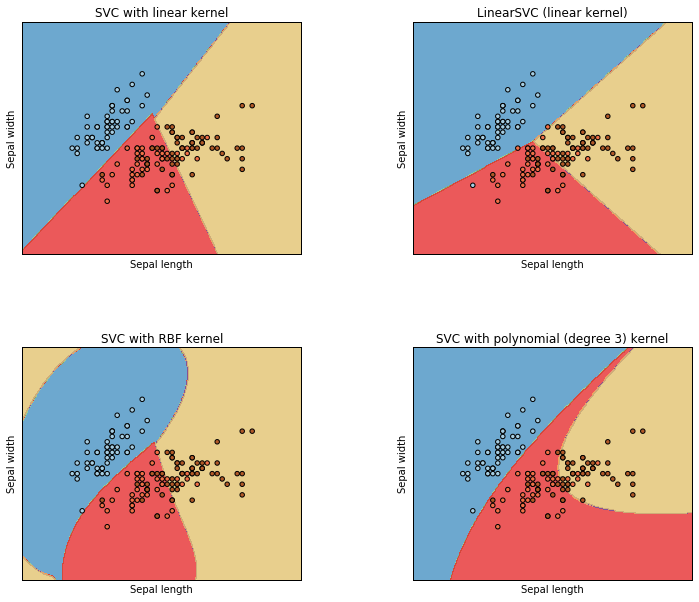

In [20]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 10)

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

SVM刚出来的时候，数据量不大，准确率高，理论完善。但是现在数据量变大，集成学习发展，深度学习发展，svm也越来不受欢迎。一个是非常慢，不适合更新，迭代模型。另一个是准确率，不如boosting, bagging这种集成模型来的高。kaggle和天池更是这样。宁愿用logistic来建模型也不用svm，虽然准确率较低，但是速度非常快。只要特征学得好，logistic也能做到很好地效果。这一点在广告行业可以得到论证。


**Practical tips of svm**


1.        Avoiding data copy: For SVC, SVR, NuSVC and NuSVR, if the data passed to certain methods is not C-ordered contiguous, and double precision, it will be copied before calling the underlying C implementation. You can check whether a given numpy array is C-contiguous by inspecting its flags attribute.

2.       For LinearSVC (and LogisticRegression) any input passed as a numpy array will be copied and converted to the liblinear internal sparse data representation (double precision floats and int32 indices of non-zero components). If you want to fit a large-scale linear classifier without copying a dense numpy C-contiguous double precision array as input we suggest to use the SGDClassifier class instead. The objective function can be configured to be almost the same as the LinearSVC model.

3.        Kernel cache size: For SVC, SVR, nuSVC and NuSVR, the size of the kernel cache has a strong impact on run times for larger problems. If you have enough RAM available, it is recommended to set cache_size to a higher value than the default of 200(MB), such as 500(MB) or 1000(MB).
> 核函数缓存大小。调大的话速度会快一些。但这个取决于你的内存有多大。比如我有16GB，那就直接分配1000MB

4.        Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it. It corresponds to regularize more the estimation.
> C默认是1，这是有理由的。如果你觉得样本里又噪音，那就把C调小一点

5.        Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. See section Preprocessing data for more details on scaling and normalization.
> SVM 是一定要求对数据做标准化，做归一化的。因为它是计算距离的。

6.        Parameter nu in NuSVC/OneClassSVM/NuSVR approximates the fraction of training errors and support vectors.

7.        In SVC, if data for classification are unbalanced (e.g. many positive and few negative), set class_weight='balanced' and/or try different penalty parameters C.
> 如何觉得数据不平衡，那就试一试class_weight, sample_weight. 或者直接试一试不同的C

8.        The underlying LinearSVC implementation uses a random number generator to select features when fitting the model. It is thus not uncommon, to have slightly different results for the same input data. If that happens, try with a smaller tol parameter.

9.        Using L1 penalization as provided by LinearSVC(loss='l2', penalty='l1', dual=False) yields a sparse solution, i.e. only a subset of feature weights is different from zero and contribute to the decision function. Increasing C yields a more complex model (more feature are selected). The C value that yields a “null” model (all weights equal to zero) can be calculated using l1_min_c.
> 如果用了L1，得到的就是一个稀疏解。用L2就不是一个稀疏解了。

虽然SVM理论学起来东西很多，对偶，凸优化之类的。但是实际应用需要注意的地方并不多。参数只有C,gamma. 另外注意下不平衡问题，还有一个就是求概率的知识点。

### Ensemble Models

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

简单理解就是讲多个单一模型组合起来。好处就是泛化能力增强，鲁棒性增强。切记，我们训练模型是为了提高泛化能力，绝不是为了在训练集上表现最佳，这没有任何意义！！！

Two families of ensemble methods are usually distinguished:
In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.
Examples: Bagging methods, Forests of randomized trees, ...

两大类的集成方法：bagging和boosting。

bagging简单来说就是抽样。假设我们有10个模型，每个模型从数据从抽取不同的数据，每一次抽取式有放回。这样10个模型就是抽了10批不同的数据。在某种程度上，我们可以认为，在模型与模型之间，没有相关性，或认为它们是独立的。这样的话把10个模型综合成一个大的模型的时候，我们就认为这个模型显著地降低了方差。（因为有10个独立的模型，这样测试新的数据集时模型的稳定性会很强）。

bagging里最出名的就是随机森林。但是RF和最初的bagging也有不同。传统的bagging是对样本进行抽样。每次都是有放回的，bootstrap. 但RF除了bagging,还对特征进行了抽样(bootstrap)。RF最后的结果是用投票的方式来表现的。bagging再加上feature（列）上的bootstrap,就进一步导致了variance下降。但会提升Bias。尽管如此，总会比单一的模型准确率高很多。

那么这里单一的模型是什么呢？虽然LR，SVM也是单一模型。但经过实践表明，最后用的都是decision tree，即弱模型，weak. 如果小模型就用SVM这种准确率很高的模型，再把它们集成起来，就很容易造成overfitting. 其他原因还有很多，具体为什么选择决策树做基模型，RF最初的论文里作者有讲，想知道的可以看看论文。

>在统计学中，自助法（Bootstrap Method，Bootstrapping或自助抽样法）是一种从给定训练集中有放回的均匀抽样，也就是说，每当选中一个样本，它等可能地被再次选中并被再次添加到训练集中。当样本来自总体，能以正态分布来描述，其抽样分布(Sampling Distribution)为正态分布(The Normal Distribution)；但当样本来自的总体无法以正态分布来描述，则以渐进分析法、自助法等来分析。采用随机可置换抽样(random sampling with replacement)。对于小数据集，自助法效果很好。

By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.
Examples: AdaBoost, Gradient Tree Boosting, ...

boosting会降低bias，它是一个修正的模型。每一次模型的更新都是学习上一次残留的误差，这就是为什么降低了bias。

#### **Random Forest**

In random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. As a result of this randomness, the bias of the forest usually slightly increases (with respect to the bias of a single non-random tree) but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model.

** Parameters**
1. n_estimators：你要准备设置多少个基类模型，就是多少个树，一个树代表一个模型。默认是10，但这个很少，不够。
2. max_features：一词抽样，一次bootstrap，抽多少个feature。
3. max_depth：最大深度。树如果一直往下，肯定会过拟合。
4. min_samples_split：有可能一个样本就被划分为一类，成为一个叶节点。一个internal node划分数据的时候，不能由1、2个样本觉得，得有多个样本决定才行。
5. bootstrap：肯定设置成true.设置成false的话就没有bagging的意义了。
6. oob_score：Whether to use out-of-bag samples to estimate the generalization accuracy. 我们每一棵树都是在选择一些样本进行训练，还有一些样本不做训练。那么把没有训练的点做validation来使用，就可以计算出分数，precision,recall之类的。

常识：
1. n_estimators：一般设的大一些。取决于数据量。
2. max_features：一般比样本里的feature小. 看官网上的参数设置。[Parameters](http://scikit-learn.org/stable/modules/ensemble.html#parameters)里说，Empirical good default values are max_features=n_features for regression problems, and max_features=sqrt(n_features) for classification tasks.
3. max_depth：5~10之间。
4. min_samples_split：看数据集。 
5. verbose：打印训练信息，比如运行时间之类。
6. n_jobs: n_jobs=-1 then all cores available on the machine are used. RF并行化非常快。因为有100个模型，各自训练自己的，最后汇总一下即可，互不干扰。相对boosting来说是非常快的。


树模型不需要标准化。涉及不到梯度下降，距离计算之类的。我们只关心每个feature的分裂，这个只和feature自身相关。

In [ ]:
class sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                              min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07,
                                              bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
                                              class_weight=None)

In [7]:
xdata.head()
#xdata.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(verbose=1)

In [11]:
rf.fit(xdata, ydata,)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=1, warm_start=False)

In [12]:
rf.score(xdata, ydata)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


0.98660974785786681

In [13]:
rf.predict_proba(xdata)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


array([[ 1. ,  0. ],
       [ 0.7,  0.3],
       [ 1. ,  0. ],
       ..., 
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0. ,  1. ]])

#### **AdaBoost**

Boosting也是建很多歌模型，但模型之间是有关联的。比如第一个模型训练完后肯定还有一些数据没有学正确，这些数据就留给第二个模型去学习。第二个模型中学不正确的就留给第三个，就这样一直递归地往下传。所以是boosting只要模型够多，步数足够长，肯定会将所以的数据都学正确。但是，这样不会过拟合吗？是的，设置一亿步的话确实会过拟合。所以我们一般不会设置那么大的数字。比如设置1000，500之类的。

boosting里很多算法。最经典的一个叫adaboost。其思想就是上面说的，但做了一些小小的调整。首先，把前面模型学习错误的样本的权重加大，学习正确的样本的权重减小。这样不断传递下去，模型就会重点关注那些分类错误的样本。逐渐递归下去。 那么问题来了，这么多模型怎么做一个评分，怎么组合起来呢？它会根据每个模型的误差来决定在最终结果中起到的作用。即模型误差越大，最后起到的作用越小。反之模型误差越小，最后的作用越大。

所有说这种模型的思想比RF更智能。因为RF是傻瓜式的随机抽样，最后组合起来做投票。但boosting每次学习的是残差。在机器学习中，我们的目标就是希望代价函数得到的误差最小，而boosting就是利用了这种思想。

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights w_1, w_2, ..., w_N to each of the training samples. Initially, those weights are all set to w_i = 1/N, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence

[adaboost为什么不容易过拟合呢](https://www.zhihu.com/question/41047671)

**Parameters**
1. n_estimators：50棵树，也可以理解为50次迭代。虽然leaning_rate比较小，但estimator要尽量大，这个要看数据集。但一般可以设置为500,600,1000.
2. learning_rate：一般比较小，比如0.01, 0.02,甚至0.00X. 
3. max_depth
4. min_samples_leaf
5. algorithm='SAMME.R' ：这个选项里的的.R是SAMME的改进版，不用管，用默认的就好。

经验：learning_rate尽量小，n_estimators尽量大。这样的话你牺牲的只是时间，但能得到更高的准确率。主要就是看这两个参数

In [ ]:
class sklearn.ensemble.AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)

In [15]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [16]:
ada.fit(xdata, ydata)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

#### **Gradient boosting **

与adaboost不一样，这个另一个boosting模型。
就是梯度下降的boosting. 那么GBDT和adaboost的区别在哪里呢？

adaboost中，每一次更新都是一个新的模型，去学习更新过后的（权重变化后的）样本。而GBDT并不是重新创建一个模型去学习，而是在原有模型的基础上进行改进。

原始的adaboost，我们建了100棵树，每一棵树学习上面残留的误差。而GBDT继承了梯度下降。每次更新都是根据误差，在原有的模型上，做一次改进。就像是在梯度下降里我们更新参数的方法一样，见下图. 把旧的参数，加收learning rate乘以求导（即梯度）。而GBTD也差不多，在原有模型上更新模型。

RF和boosting都很难过拟合，具体自己看下面的资料。

[Stochastic gradient descent](https://i.stack.imgur.com/SH3mZ.png)

下面的wiki给出了解释，台大的课也有相应章节。主要就是两个，一个是boosting的思想，一个是梯度下降这个算法。

[Wikipedia Gradient Boosting](https://en.wikipedia.org/wiki/Gradient_boosting)

[为什么在实际的 kaggle 比赛中 gbdt 和 random forest 效果非常好？](https://www.zhihu.com/question/51818176)

In [ ]:
class sklearn.ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse',
                                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
                                                  min_impurity_split=1e-07, init=None, random_state=None, max_features=None, verbose=0, 
                                                  max_leaf_nodes=None, warm_start=False, presort='auto')

关于参数，除了adaboost里说到的learning rate和estimator外，还有一个比较重要的参数是subsample。默认情况下subsample=1.0，这个选择很不好，这代表你每一次学习的时候选取的是全部的数据集，这样没有意义。因为每次学习的都是同一组数据，而不是有放回的随机抽取一些数据。如果借鉴一下bagging里那种抽取一小部分数据，就可以降低模型的varience。这样的话模型就不容易有相关性，不容易拟合，每一次模型都能学到不一样的东西。所以subsample一般不设置1，0.4,0.6,0.7,0.8都可以。用cross validation来选取。

max_depth：深度设置越大，模型越复杂，越容易提高准确率。但是也容易造成过拟合。一般设置6，7，8，9，10都可以。千万别设置50，100，0.没有意义。

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gsc = GradientBoostingClassifier()

In [18]:
gsc.fit(xdata, ydata)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [19]:
gsc.score(xdata, ydata)

0.86904579097693557

首先为什么会有其他的一些boosting包呢？
因为sklearn里不允许有missing value。 
而xgboost, lightGBM能很好地处理missing value.

另外boosting的原理中每个模型是依赖上一个模型的，所以这方面不能像RF那样做并行。boosting的并行实在feature上做的。我们在做树模型的时候，最大的消耗量是在特征选择上，就是计算特征的熵或基尼，所以xgboost是在不同机器不同进程上来计算每一个feature的变动。另外xgboost是在泰勒二阶展开式上做计算，传统的都是一阶泰勒展开。另外xgboost可以在子节点或叶节点上做正则（L1或是L2），好处就是模型不容易拟合。但这个特性在sklearn对于的包里并没有。另外可以自定义评估函数，代价函数。还有就是对missing value的处理。

#### xgboost
[XGBoost: A Scalable Tree Boosting System](https://arxiv.org/abs/1603.02754)

[XGBoost Github](https://github.com/dmlc/xgboost)

Building on Ubuntu/Debian
1. git clone --recursive https://github.com/dmlc/xgboost
2. cd xgboost
3. make -j4

Building on OSX
1. git clone --recursive https://github.com/dmlc/xgboost
2. cd xgboost
3. cp make/minimum.mk ./config.mk
4. make -j4

python setup.py install


OR 

pip install xgboost

[机器学习算法中GBDT和XGBOOST的区别有哪些](https://www.zhihu.com/question/41354392)

In [ ]:
class xgboost.XGBClassifier(self, max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='binary:logistic', nthread=-1, 
                            gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, base_score=0.5, seed=0)

参数：
objective='binary:logistic'：代价函数，可以自己定义。
nthread=-1： 设置多少个线程

In [21]:
import xgboost 
xgb = xgboost.XGBClassifier()
xgb.fit(xdata, ydata)
xgb.predict_proba(xdata)

array([[ 0.90383351,  0.09616648],
       [ 0.64250493,  0.35749504],
       [ 0.96266341,  0.03733658],
       ..., 
       [ 0.95334816,  0.04665186],
       [ 0.99682081,  0.00317921],
       [ 0.01615542,  0.98384458]], dtype=float32)

#### **lightGBM**

现在这个lib已经支持python了，之后需要的时候看文档练练手。

[LightGBM Github](https://github.com/Microsoft/LightGBM)


LightGBM is a gradient boosting framework that is using tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

* Fast training speed and high efficiency
* Lower memory usage
* Better accuracy
* Parallel learning supported
* Capability of handling large scale data

**Optimization in speed and memory usage**

Many boosting tools use pre-sorted based algorithms[1][2](e.g. default algorithm in xgboost) for decision tree learning. It is a simple solution, but not easy to optimize.

LightGBM uses the histogram based algorithms[3][4][5], which bucketing continuous feature(attribute) values into discrete bins, to speed up training procedure and reduce memory usage. Following are advantages for histogram based algorithms:

1. Reduce calculation cost of split gain
Pre-sorted based algorithms need O(#data) times calculation
Histogram based algorithms only need to calculate O(#bins) times, and #bins is far smaller than #data
It still needs O(#data) times to construct histogram, which only contain sum-up operation

2. Only need to split data one time after finding best split point
Pre-sorted based algorithms need to split data O(#features) times (since different features access data in different order)

3. Use histogram subtraction for further speed-up
To get one leaf's histograms in a binary tree, can use the histogram subtraction of its parent and its neighbor
So it only need to construct histograms for one leaf (with smaller #data than its neighbor), then can get histograms of its neighbor by histogram subtraction with small cost( O(#bins) )

4. Reduce Memory usage
Can replace continuous values to discrete bins. If #bins is small, can use small data type, e.g. uint8_t, to store training data
No need to store additional information for pre-sorting feature values

5. Reduce communication cost for parallel learning

[More Details](https://github.com/Microsoft/LightGBM/wiki)

For linux, by running following command in this folder:

./lightgbm config=train.conf

[train.conf](https://github.com/Microsoft/LightGBM/blob/master/examples/binary_classification/train.conf)

Prediction

./lightgbm config=predict.conf

In [ ]:
import subprocess
subprocess.call(['./lightgbm','config=train.conf'])